# ACMS 40210 \- Spring 2024

## TV Shows, Reviews & Streaming Services
---



In [1]:
import pandas as pd

tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head(8)

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
5,5,The Office,2005,16+,8.9,81%,1,0,0,0,1
6,6,Black Mirror,2011,18+,8.8,83%,1,0,0,0,1
7,7,Supernatural,2005,16+,8.4,93%,1,0,0,0,1


### Analysing the Dataset

In [2]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [3]:
# Show Distribution Before
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

service_list = []
for service in services:
    original_service_df = tv_shows[tv_shows[service] == 1] # New dataframe containing only the shows available on the 4 given streaming services
    count = original_service_df.shape[0] # The number of shows in this new dataframe

    service_list.append({'Streaming Service': service,
                                'Number of Shows': count})

pd.DataFrame(service_list).sort_values(by='Number of Shows', ascending=False)

,Streaming Service,Number of Shows
2,Prime Video,2144
0,Netflix,1931
1,Hulu,1754
3,Disney+,180


In [4]:
print(tv_shows['Year'].agg(['min', 'max']))
type

min    1901
max    2020
Name: Year, dtype: int64


type

In [5]:
tv_shows['type'].nunique()

1

In [6]:
tv_shows['Age'].unique()

array(['18+', '16+', '7+', nan, 'all', '13+'], dtype=object)

In [7]:
tv_shows[tv_shows['Rotten Tomatoes'].isna()].head(18)

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
85,85,Death Note,2006,18+,9.0,NaN,1,1,0,0,1
93,93,American Horror Story,2011,18+,8.0,NaN,1,1,1,0,1
96,96,Criminal Minds,2005,16+,8.1,NaN,1,0,0,0,1
119,119,Person of Interest,2011,16+,8.4,NaN,1,0,0,0,1
128,128,Hunter x Hunter,2011,16+,8.9,NaN,1,1,0,0,1
132,132,Naruto,2002,7+,8.3,NaN,1,1,0,0,1
151,151,Law & Order: Special Victims Unit,1999,16+,8.0,NaN,1,1,1,0,1
159,159,Resurrection: Ertugrul,2014,16+,7.7,NaN,1,0,0,0,1
177,177,Allo 'Allo!,1984,7+,8.3,NaN,1,0,0,0,1
183,183,Crash Landing on You,2019,16+,8.8,NaN,1,0,0,0,1


### Performing Clean-up

In [8]:
# Before Cleanup
sorted_tv_shows = tv_shows.sort_values(by='IMDb', ascending=False)
sorted_tv_shows.head(8)

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
3023,3023,Destiny,2014,NaN,9.6,NaN,0,1,0,0,1
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
3747,3747,Malgudi Days,1987,all,9.5,NaN,0,0,1,0,1
3177,3177,Hungry Henry,2014,NaN,9.5,NaN,0,1,0,0,1
2365,2365,The Joy of Painting,1983,all,9.4,NaN,0,1,1,0,1
3567,3567,Band of Brothers,2001,18+,9.4,94%,0,0,1,0,1
3566,3566,The Wire,2002,18+,9.3,94%,0,0,1,0,1
91,91,Our Planet,2019,7+,9.3,93%,1,0,0,0,1


In [9]:
tv_shows[tv_shows['Netflix']==1]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1926,1926,The Golden Path,2012,NaN,NaN,NaN,1,0,0,0,1
1927,1927,JingleKids,2019,NaN,NaN,NaN,1,0,0,0,1
1928,1928,Sin Ellas No Hay Paraíso,2013,NaN,NaN,NaN,1,0,0,0,1
1929,1929,Slice of Paradise,2017,NaN,NaN,NaN,1,0,0,0,1


In [10]:
tv_shows[(tv_shows['Hulu']==1)&(tv_shows['Netflix']==0)]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
1931,1931,Rick and Morty,2013,18+,9.2,94%,0,1,0,0,1
1932,1932,Fargo,2014,18+,8.9,96%,0,1,0,0,1
1933,1933,Vikings,2013,18+,8.5,93%,0,1,1,0,1
1934,1934,Brooklyn Nine-Nine,2013,16+,8.4,97%,0,1,0,0,1
1935,1935,The Simpsons,1989,7+,8.7,85%,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3561,3561,Newsy,2016,NaN,NaN,NaN,0,1,0,0,1
3562,3562,Modd Couples,2016,NaN,NaN,NaN,0,1,0,0,1
3563,3563,Fantasy Forecast,2016,NaN,NaN,NaN,0,1,0,0,1
3564,3564,Secret Talent Theatre,2016,NaN,NaN,NaN,0,1,0,0,1


In [11]:
tv_shows[(tv_shows['Prime Video'] ==1)&(tv_shows['Hulu']==0)&(tv_shows['Netflix']==0)]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
3566,3566,The Wire,2002,18+,9.3,94%,0,0,1,0,1
3567,3567,Band of Brothers,2001,18+,9.4,94%,0,0,1,0,1
3568,3568,The Sopranos,1999,18+,9.2,92%,0,0,1,0,1
3569,3569,House,2004,16+,8.7,90%,0,0,1,0,1
3570,3570,Mr. Robot,2015,18+,8.5,94%,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5450,5450,Sawyer Sessions,2015,NaN,NaN,NaN,0,0,1,0,1
5451,5451,Pinkfong! Dinosaur Songs,2014,NaN,NaN,NaN,0,0,1,0,1
5452,5452,How To Self-Publish,2017,NaN,NaN,NaN,0,0,1,0,1
5453,5453,BigDo2 - Random Hair,2016,NaN,NaN,NaN,0,0,1,0,1


In [12]:
tv_shows[(tv_shows['Disney+']==1)&(tv_shows['Prime Video']==0)&(tv_shows['Netflix']==0)&(tv_shows['Hulu']==0)]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
5455,5455,The Mandalorian,2019,7+,8.7,93%,0,0,0,1,1
5456,5456,Star Wars: The Clone Wars,2008,7+,8.2,93%,0,0,0,1,1
5457,5457,Marvel's Agent Carter,2015,7+,7.9,86%,0,0,0,1,1
5458,5458,Star Wars Rebels,2014,7+,8.0,100%,0,0,0,1,1
5459,5459,DuckTales,2017,7+,8.2,100%,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [13]:
def keep_top_60_percent(group):
    keep_count = int(len(group) * 0.60)
    return group.iloc[:keep_count]

relevent_tv_shows = pd.concat([
    keep_top_60_percent(tv_shows[tv_shows['Netflix']==1]),
    keep_top_60_percent(tv_shows[(tv_shows['Hulu']==1)&(tv_shows['Netflix']==0)]),
    keep_top_60_percent(tv_shows[(tv_shows['Prime Video'] ==1)&(tv_shows['Hulu']==0)&(tv_shows['Netflix']==0)]),
    keep_top_60_percent(tv_shows[(tv_shows['Disney+']==1)&(tv_shows['Prime Video']==0)&(tv_shows['Netflix']==0)&(tv_shows['Hulu']==0)])
])

relevent_tv_shows

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5543,5543,Fantastic Four,1994,7+,6.5,NaN,0,0,0,1,1
5544,5544,Silver Surfer,1998,7+,7.1,NaN,0,0,0,1,1
5545,5545,My Friends Tigger & Pooh,2007,all,5.8,NaN,0,0,0,1,1
5546,5546,Imagination Movers,2008,all,7.0,NaN,0,0,0,1,1


In [14]:
# More Cleaning
clean_tv_shows = relevent_tv_shows.copy()
# Dropping TV shows that are missing BOTH and IMDb and a Rotten Tomatoes Rating 
clean_tv_shows = clean_tv_shows.dropna(subset=['IMDb', 'Rotten Tomatoes'], how='all')


# Renaming the Year and Age columns to make it clearer what they mean. 
clean_tv_shows.rename(columns={'Year':'Release Year', 'Age':'Age Rating'}, inplace=True)

# Converting the Rotten Tomatoes review and Age from a string to a float
# We do this so that we can do mathematical calculations 

clean_tv_shows['Rotten Tomatoes'] = clean_tv_shows['Rotten Tomatoes'].str.replace('%', '').astype(float)
clean_tv_shows['Age Rating'] = clean_tv_shows['Age Rating'].str.replace('+', '').replace('all', '0').astype(float)

# Because the 'type' column only contains the number 1 for every entry, we dropped this column
clean_tv_shows = clean_tv_shows.drop(columns=['type', 'Unnamed: 0'])

# Step 1: Sort by Rotten Tomatoes, then IMDb
clean_tv_shows = clean_tv_shows.sort_values(['IMDb','Rotten Tomatoes'], ascending=[False, False])
clean_tv_shows.head(8)


,Title,Release Year,Age Rating,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18.0,9.5,96.0,1,0,0,0
3747,Malgudi Days,1987,0.0,9.5,NaN,0,0,1,0
3567,Band of Brothers,2001,18.0,9.4,94.0,0,0,1,0
2365,The Joy of Painting,1983,0.0,9.4,NaN,0,1,1,0
3566,The Wire,2002,18.0,9.3,94.0,0,0,1,0
91,Our Planet,2019,7.0,9.3,93.0,1,0,0,0
325,Ramayan,1987,0.0,9.3,NaN,1,0,0,0
4128,Green Paradise,2011,0.0,9.3,NaN,0,0,1,0


In [15]:
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

service_list = []
for service in services:
    updated_service_df = clean_tv_shows[clean_tv_shows[service] == 1] # New dataframe containing only the shows available on the 4 given streaming services
    count = updated_service_df.shape[0] # The number of shows in this new dataframe

    service_list.append({'Streaming Service': service,
                                'Number of Shows': count})

pd.DataFrame(service_list).sort_values(by='Number of Shows', ascending=False)

,Streaming Service,Number of Shows
2,Prime Video,1243
0,Netflix,1155
1,Hulu,1087
3,Disney+,112


In [16]:
service_list_after = []
for service in services:
    service_df_after = clean_tv_shows[clean_tv_shows[service] == 1] # New dataframe containing only the shows available on the 4 given streaming services
    count = service_df_after.shape[0] # The number of shows in this new dataframe

    service_list_after.append({'Streaming Service': service,
                                'Number of Shows': count})

pd.DataFrame(service_list_after).sort_values(by='Number of Shows', ascending=False)

,Streaming Service,Number of Shows
2,Prime Video,1243
0,Netflix,1155
1,Hulu,1087
3,Disney+,112


### Which Streaming Service is The Best

In [17]:
# Which Streaming Service has the highest IMDb average?
compare_data = clean_tv_shows.copy()
compare_data = compare_data[compare_data['IMDb'] > 3.0]
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
avg_imdb_list = []

for service in services:
    service_df = compare_data[compare_data[service] == 1] # New dataframe containing only the shows available on the 4 given streaming services
    avg_imdb = service_df['IMDb'].mean()
    count = service_df.shape[0] # The number of shows in this new dataframe

    avg_imdb_list.append({'Streaming Service': service,
                     'Average IMDb': round(avg_imdb, 2),
                     'Number of Shows': count}) # We appended a dictionary to the list 'avg_imdb_list'

avg_imdb_df = pd.DataFrame(avg_imdb_list)
avg_imdb_df.sort_values(by='Average IMDb', ascending=False)


,Streaming Service,Average IMDb,Number of Shows
0,Netflix,7.52,1154
1,Hulu,7.36,1086
2,Prime Video,7.25,1235
3,Disney+,7.10,112


C:\Users\amann\AppData\Local\Temp\ipykernel_14620\316479031.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=imdb_df,
C:\Users\amann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 33.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Text(75.84722222222221, 0.5, 'IMDb Rating')

C:\Users\amann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


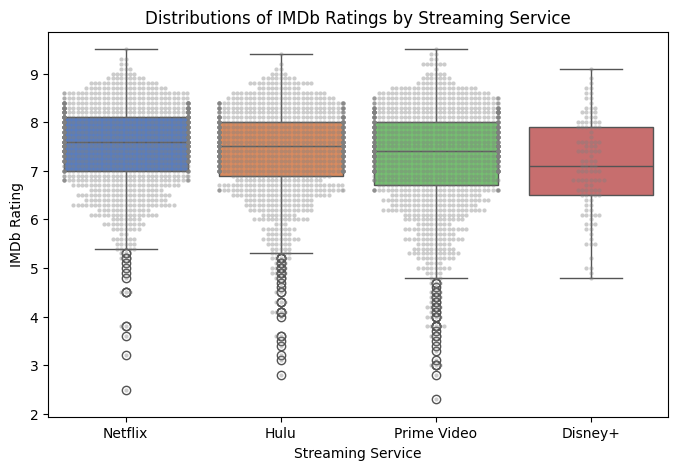

In [18]:
# Showing the IMBd Distributions in a Boxplot & Swarmplot for each Streaming Service

import seaborn as sns
import matplotlib.pyplot as plt

services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

imdb_data = []

for service in services:
    subset = clean_tv_shows[clean_tv_shows[service] == 1][['Title', 'IMDb']].copy() # Selecting Title and IMDb from the shows that are available on at least 1 of the Streaming Services
    subset['Streaming Service'] = service
    imdb_data.append(subset) 

imdb_df = pd.concat(imdb_data, ignore_index=True)

fig, axes = plt.subplots(figsize=(8,5))
sns.boxplot(data=imdb_df, 
               x='Streaming Service', 
               y='IMDb', 
               palette='muted')
sns.swarmplot(data=imdb_df,
              x = 'Streaming Service',
              y = 'IMDb',
              alpha = 0.4,
              color='grey',
              size=3)

plt.title("Distributions of IMDb Ratings by Streaming Service")
plt.xlabel("Streaming Service")
plt.ylabel("IMDb Rating")

In [20]:
# Which Streaming Service has the MOST of the Top 50 TV Shows?
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

top_50_shows_service = clean_tv_shows.head(50)
service_counts = {}
for service in services:
    service_counts[service] = top_50_shows_service[service].sum()

service_counts_df = pd.DataFrame(list(service_counts.items()), 
                                 columns=['Streaming Service', 'Top 50 Show Count']
                                 ).sort_values(by='Top 50 Show Count', ascending=False)
service_counts_df

,Streaming Service,Top 50 Show Count
0,Netflix,23
2,Prime Video,19
1,Hulu,15
3,Disney+,2


C:\Users\amann\AppData\Local\Temp\ipykernel_14620\48061810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=service_counts_df,


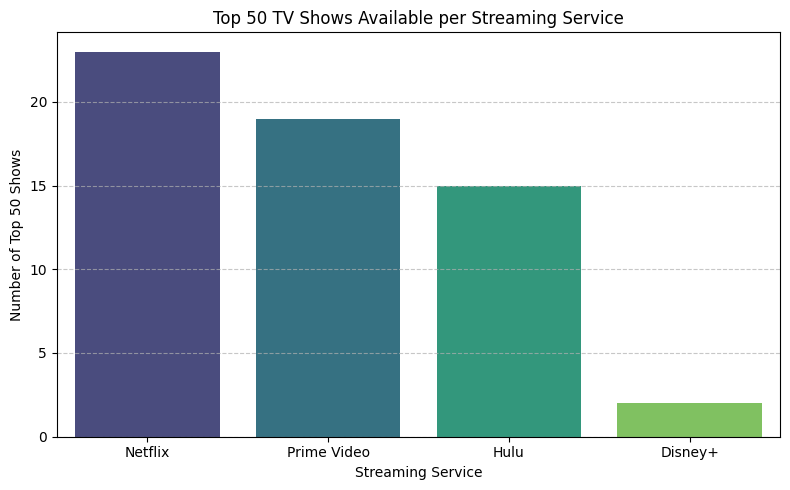

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(data=service_counts_df, 
            x='Streaming Service', 
            y='Top 50 Show Count', 
            palette='viridis')

plt.title('Top 50 TV Shows Available per Streaming Service')
plt.ylabel('Number of Top 50 Shows')
plt.xlabel('Streaming Service')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Extra Analaysis (Not in Presentation)

In [22]:
# Further Analysis: Which service has the most Kids TV shows?
kids_shows = clean_tv_shows[clean_tv_shows['Age Rating'] == 0]
kids_shows.head()

,Title,Release Year,Age Rating,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
3747,Malgudi Days,1987,0.0,9.5,NaN,0,0,1,0
2365,The Joy of Painting,1983,0.0,9.4,NaN,0,1,1,0
325,Ramayan,1987,0.0,9.3,NaN,1,0,0,0
4128,Green Paradise,2011,0.0,9.3,NaN,0,0,1,0
3649,The Planets,2019,0.0,9.1,100.0,0,0,1,0


In [23]:
top_kids_shows = kids_shows.head(50)

service_counts = {}
for service in services:
    service_counts[service] = top_kids_shows[service].sum()

service_counts_df = pd.DataFrame(list(service_counts.items()), 
                                 columns=['Streaming Service', 'Top 50 Show Count']
                                 ).sort_values(by='Top 50 Show Count', ascending=False)
service_counts_df

,Streaming Service,Top 50 Show Count
2,Prime Video,27
0,Netflix,15
1,Hulu,11
3,Disney+,2


In [24]:
# Making 'Available On' Column
available_tv_shows = clean_tv_shows.copy()

# Define a function to list which streamimng services a show is available on
services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
def get_services(row): # Input is the title of a TV Show
    where_to_watch = []
    for service in services:
        if row[service] == 1: # If the streaming service column has a 1 for that TV show
            where_to_watch.append(service) 
    return ', '.join(where_to_watch) # Allows for shows that are available on multiple streaming services

# Create an 'Available On' column using the function
available_tv_shows['Available On'] = available_tv_shows[services].apply(get_services, axis=1)
available_tv_shows = available_tv_shows.drop(columns=['Netflix', 'Hulu', 'Prime Video', 'Disney+'])


available_tv_shows.head(10)

,Title,Release Year,Age Rating,IMDb,Rotten Tomatoes,Available On
0,Breaking Bad,2008,18.0,9.5,96.0,Netflix
3747,Malgudi Days,1987,0.0,9.5,NaN,Prime Video
3567,Band of Brothers,2001,18.0,9.4,94.0,Prime Video
2365,The Joy of Painting,1983,0.0,9.4,NaN,"Hulu, Prime Video"
3566,The Wire,2002,18.0,9.3,94.0,Prime Video
91,Our Planet,2019,7.0,9.3,93.0,Netflix
325,Ramayan,1987,0.0,9.3,NaN,Netflix
4128,Green Paradise,2011,0.0,9.3,NaN,Prime Video
9,Avatar: The Last Airbender,2005,7.0,9.2,100.0,Netflix
1931,Rick and Morty,2013,18.0,9.2,94.0,Hulu


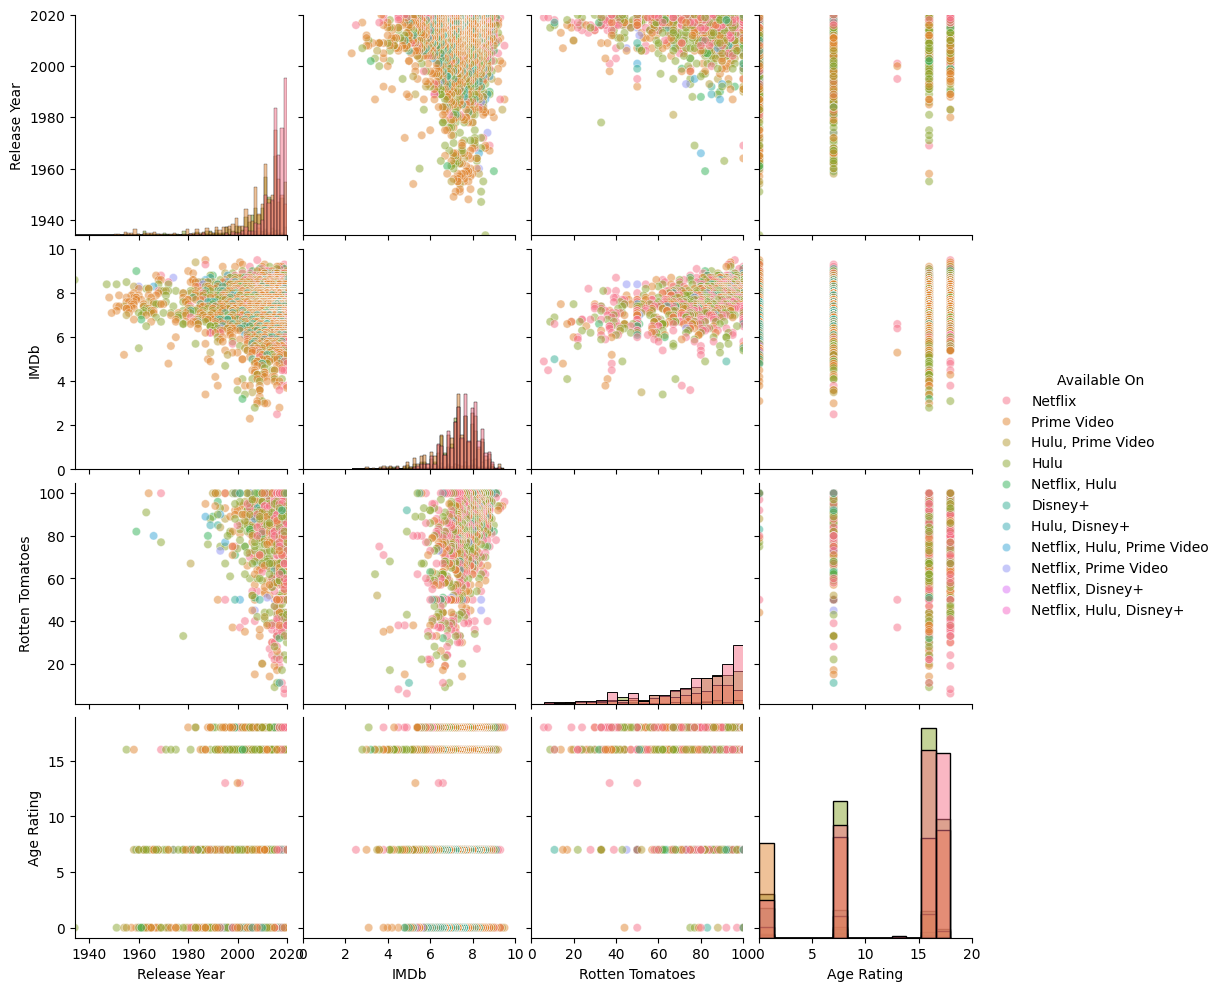

In [25]:
# Overall pairplot comparing the variables
import seaborn as sns 

pairplot = sns.pairplot(available_tv_shows[['Release Year', 'IMDb', 'Rotten Tomatoes', 'Age Rating', 'Available On']], 
             hue = 'Available On',
             diag_kind = 'hist',
             plot_kws={'alpha': 0.5})

for ax in pairplot.axes.flat:
    if ax is not None:
        if ax.get_xlabel() == 'Release Year':
            ax.set_xlim(1934, 2020)
        if ax.get_ylabel() == 'Release Year':
            ax.set_ylim(1934, 2020)

for ax in pairplot.axes.flat:
    if ax is not None:
        if ax.get_xlabel() == 'IMDb':
            ax.set_xlim(0.0, 10.0)
        if ax.get_ylabel() == 'IMDb':
            ax.set_ylim(0.0, 10.0)

for ax in pairplot.axes.flat:
    if ax is not None:
        if ax.get_xlabel() == 'Rotten Tomatoes':
            ax.set_xlim(0, 100)

for ax in pairplot.axes.flat:          
    if ax is not None:
        if ax.get_xlabel() == 'Age Rating':
            ax.set_xlim(0, 20)

### Can we predict IMDb Ratings?

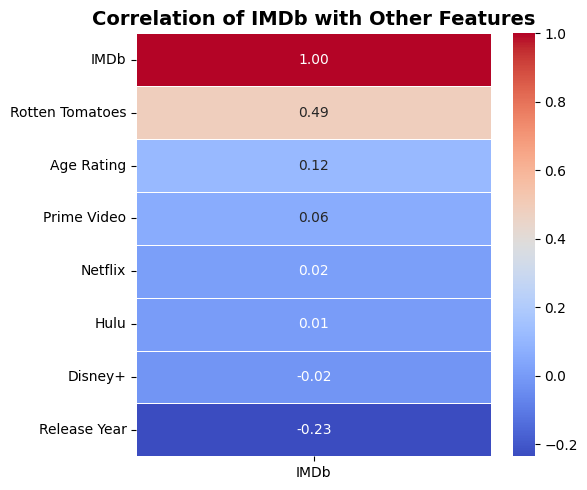

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns (adjust as needed)
numeric_columns = ['IMDb', 'Rotten Tomatoes', 'Release Year', 'Age Rating', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']

# Drop rows with missing values in these columns
corr_data = clean_tv_shows[numeric_columns].dropna()

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Extract only IMDb correlations
imdb_corr = corr_matrix[['IMDb']].sort_values(by='IMDb', ascending=False)

# Plot the IMDb correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(imdb_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation of IMDb with Other Features", fontsize=14, fontweight = 'semibold')
plt.tight_layout()
plt.show()

In [27]:
# Predicting IMDb score based on the other columns
clean_tv_shows = clean_tv_shows.sort_index()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

clean_tv_shows = clean_tv_shows.dropna(subset=['IMDb', 'Rotten Tomatoes'])
features = ['Rotten Tomatoes', 'Release Year', 'Age Rating','Hulu', 'Prime Video','Netflix', 'Disney+']
target = 'IMDb'

x = clean_tv_shows[features]
y = clean_tv_shows[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

titles = clean_tv_shows.loc[X_test.index, 'Title']

results = pd.DataFrame({'Title':titles, 'Actual IMDb': y_test, 'Predicted IMDb': y_pred, 'Error': abs(y_pred - y_test)})
results = results.round({'Predicted IMDb': 2, 'Error': 2})

print("Sample Predictions")
results.sample(5)


Sample Predictions


,Title,Actual IMDb,Predicted IMDb,Error
76,Bodyguard,8.1,7.84,0.26
2178,Body of Proof,7.1,7.55,0.45
2310,Into the Dark,6.3,7.23,0.93
2735,Criminal Minds: Suspect Behavior,6.3,6.97,0.67
230,The Order,6.9,7.81,0.91


In [28]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score (Model Accuracy): {r2:.2f}")

Mean Absolute Error (MAE): 0.47
R² Score (Model Accuracy): 0.35


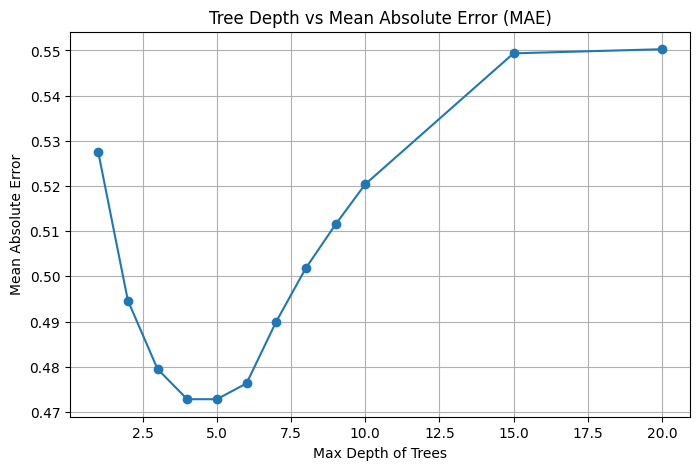

In [29]:
def get_mae(depth, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators = 100, max_depth=depth, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
mae_values = []

for depth in depths:
    mean_abs_error = get_mae(depth, X_train, X_test, y_train, y_test)
    mae_values.append(mean_abs_error)

plt.figure(figsize=(8,5))
plt.plot(depths, mae_values, marker='o')
plt.title('Tree Depth vs Mean Absolute Error (MAE)')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()

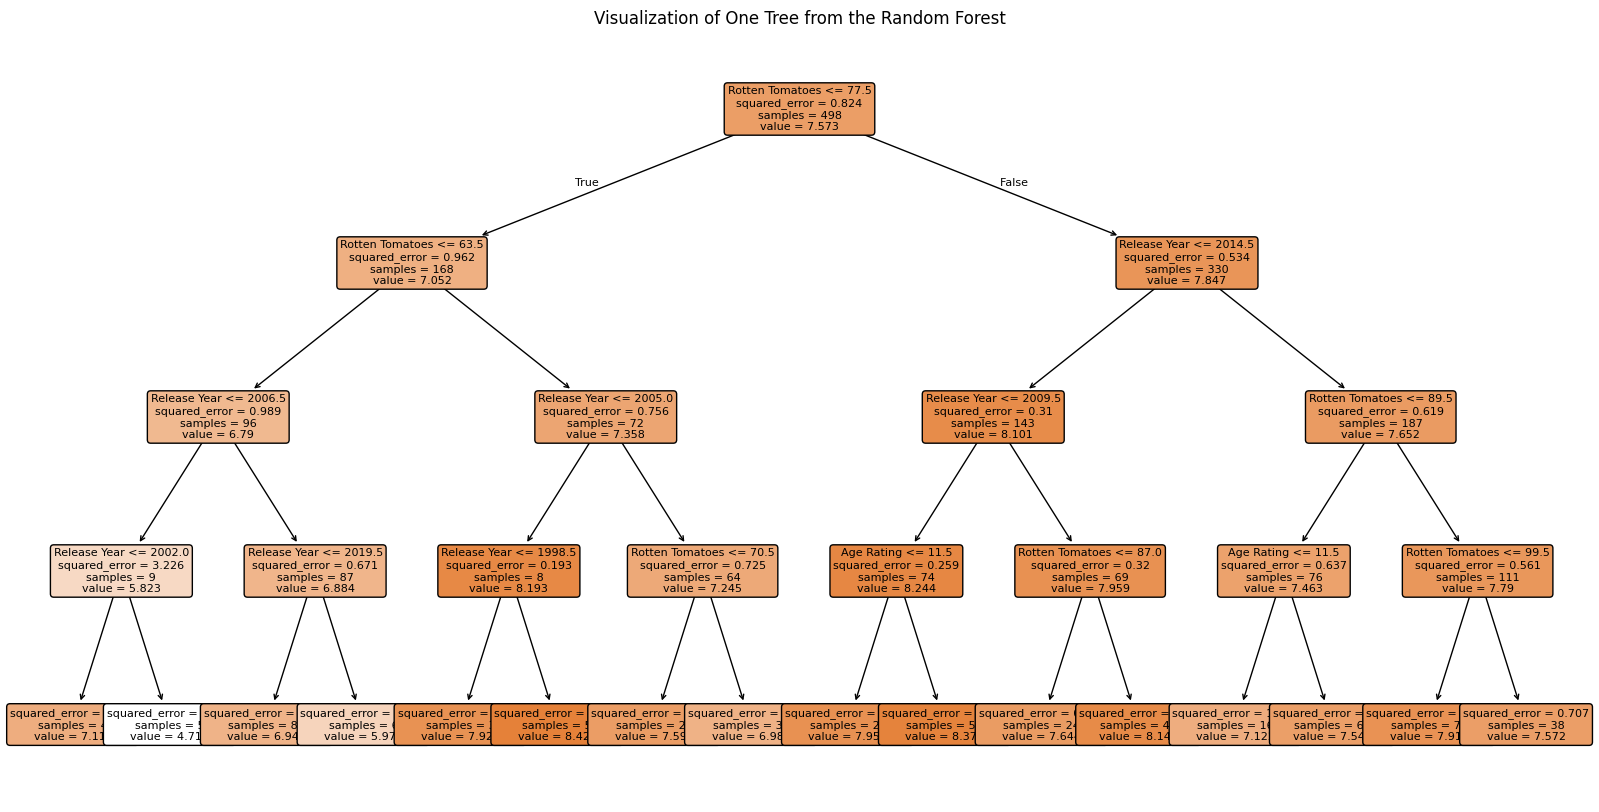

In [30]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick one tree from the forest
one_tree = model.estimators_[0]

# Plot that tree
plt.figure(figsize=(20, 10))  # Make it big enough
plot_tree(one_tree, 
          feature_names=x.columns, 
          filled=True, 
          rounded=True, 
          fontsize=8)
plt.title('Visualization of One Tree from the Random Forest')
plt.show()


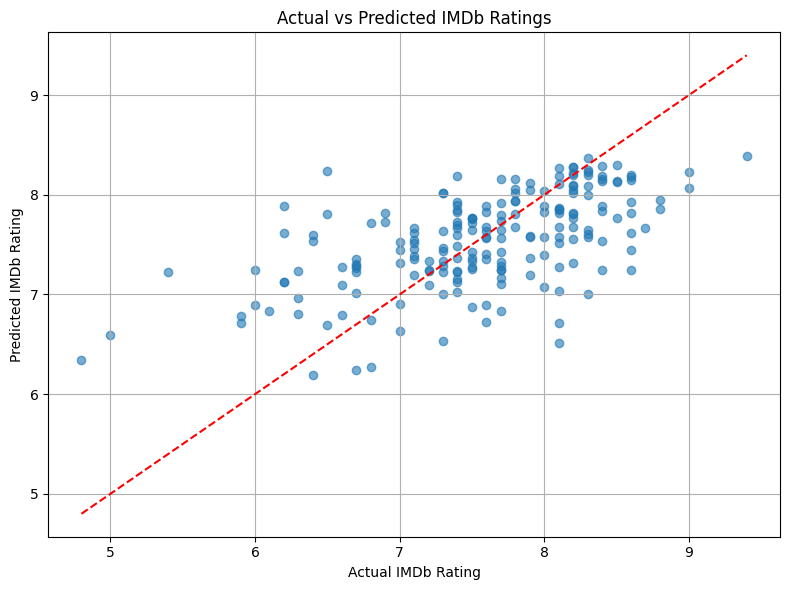

In [31]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Perfect prediction line
plt.xlabel('Actual IMDb Rating')
plt.ylabel('Predicted IMDb Rating')
plt.title('Actual vs Predicted IMDb Ratings')
plt.grid(True)
plt.tight_layout()
plt.show()